# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


/home/lemaitre/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '
/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


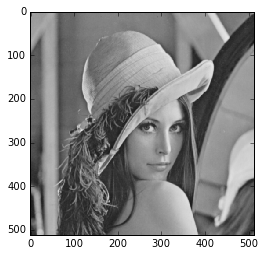

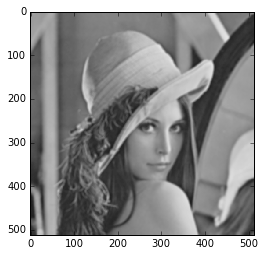

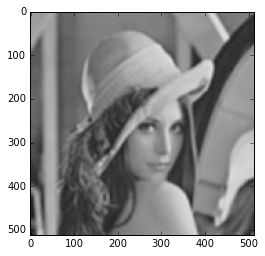

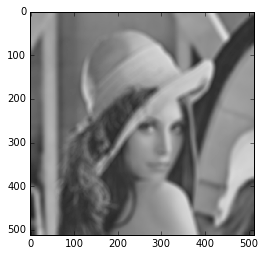

In [2]:
from skimage.filter import rank
from skimage.morphology import disk 

Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

sz_disk = [1, 3, 5, 7]
for f in sz_disk:
    avg = rank.mean(lena_im, disk(f))
    # Show the image with grey colormap
    plt.figure()
    io.imshow(avg)
    

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

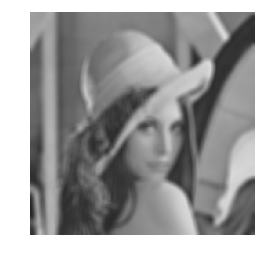

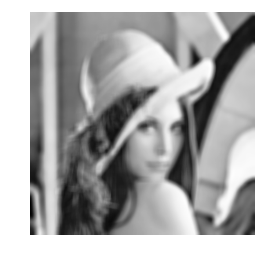

In [3]:
from scipy import ndimage

# Create the mean filter
mask_mean = np.ones((14,14), dtype=float)
# Normalise the mask
mask_mean /= np.sum(np.sum(mask_mean))

# Compute the convolution
lena_mean = ndimage.filters.convolve(lena_im, mask_mean)

# io.imshow shows the image while rescale between the range of the image
plt.figure()
io.imshow(lena_mean)
plt.axis('off')
# plt.imshow rescale the image between 
plt.figure()
plt.imshow(lena_mean, cmap = cm.Greys_r)
plt.axis('off')
plt.show()


Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [4]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

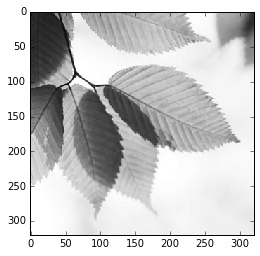

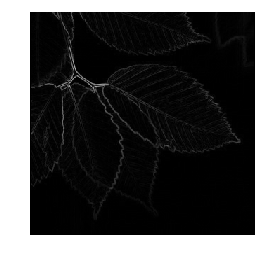

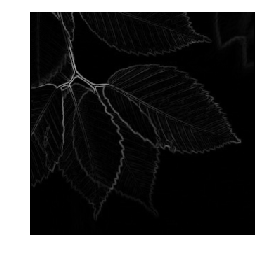

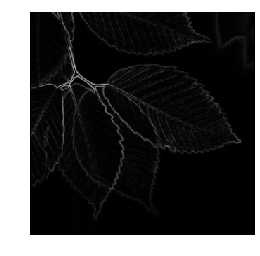

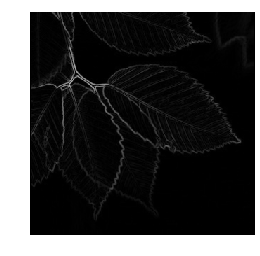

In [5]:
# Show leaves.jpg image 
leaves_im = io.imread(Path.__add__('leaves.jpg'))
leaves_im = img_as_float(color.rgb2gray(leaves_im))
plt.figure
io.imshow(leaves_im)
plt.show()

# Compute the set of the different basic edge detector
### Compute Roberts
leaves_roberts = filters.roberts(leaves_im)
### Compute Prewitt
leaves_prewitt = filters.prewitt(leaves_im)
### Compute Sobel 
leaves_sobel = filters.sobel(leaves_im)
### Compute Scharr
leaves_scharr = filters.scharr(leaves_im)

# Plot the different resulting images
plt.figure()
plt.axis('off')
io.imshow(leaves_roberts)
plt.figure()
plt.axis('off')
io.imshow(leaves_prewitt)
plt.figure()
plt.axis('off')
io.imshow(leaves_sobel)
plt.figure()
plt.axis('off')
io.imshow(leaves_scharr)


##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

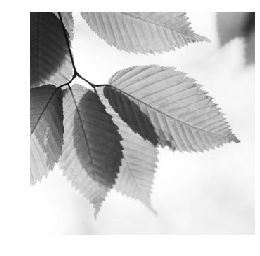

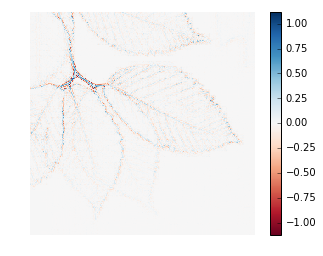

In [10]:
from scipy.ndimage.filters import laplace
# Show Leaves
io.imshow(leaves_im)
plt.axis('off')
plt.show()

# Compute the second order derivative using Laplace
leaves_laplace = laplace(leaves_im)

# Show the results
plt.figure()
io.imshow(leaves_laplace)
plt.axis('off')
plt.show()


##### Angular edge detector

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.

The `filters.gabor` in `skimage` implements this `filter.gabor`. 

**Apply this filters to find the edge at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].**

/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/filters/_gabor.py:98: skimage_deprecation: Call to deprecated function ``gabor_filter``. Use ``skimage.filters.gabor`` instead.
  sigma_y=None, n_stds=3, offset=0, mode='reflect', cval=0):
/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/filters/_gabor.py:98: skimage_deprecation: Call to deprecated function ``gabor_filter``. Use ``skimage.filters.gabor`` instead.
  sigma_y=None, n_stds=3, offset=0, mode='reflect', cval=0):
/home/lemaitre/anaconda/lib/python2.7/site-packages/scikit_image-0.12.dev0-py2.7-linux-x86_64.egg/skimage/filters/_gabor.py:98: skimage_deprecation: Call to deprecated function ``gabor_filter``. Use ``skimage.filters.gabor`` instead.
  sigma_y=None, n_stds=3, offset=0, mode='reflect', cval=0):


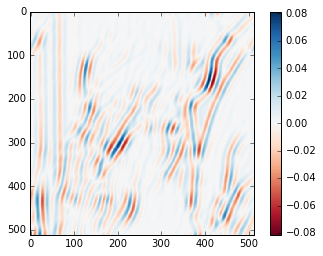

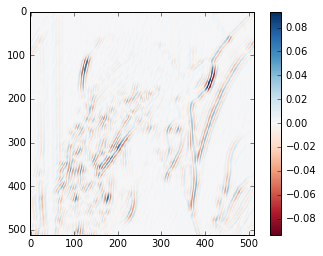

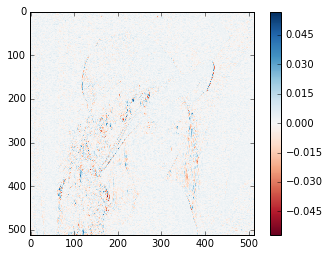

In [11]:

# Define the different frequencies to use for the edge detection
freq = [.05, .1, .5]

for f in freq:
    plt.figure()
    lena_gabor_re, lena_gabor_im = filters.gabor_filter(lena_im, f, theta=60)
    io.imshow(lena_gabor_re)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [8]:
from skimage import util

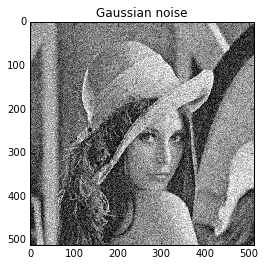

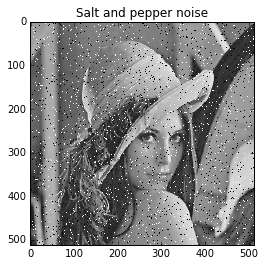

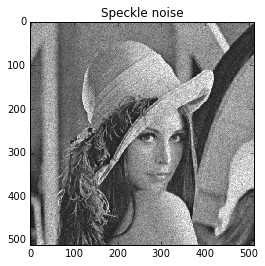

In [12]:
# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

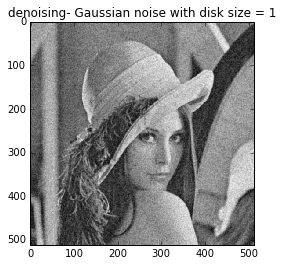

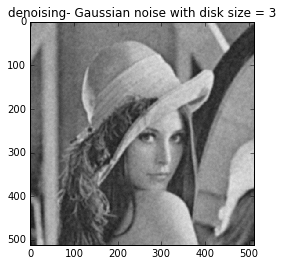

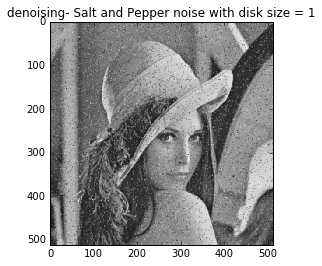

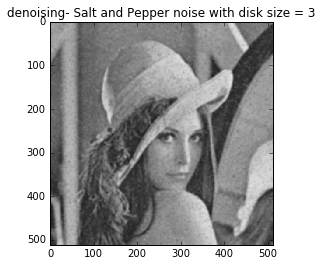

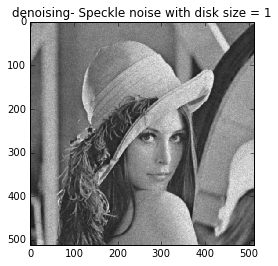

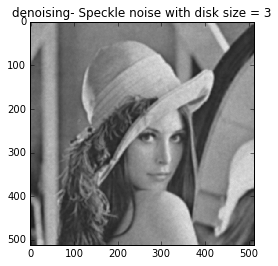

In [13]:
sz_disk = [1, 3]

for sz in sz_disk:
    lena_smooth = filters.rank.mean(lena_gaussian, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Gaussian noise with disk size = {}'.format(sz))
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean(lena_sp, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Salt and Pepper noise with disk size = {}'.format(sz))
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean(lena_speckle, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Speckle noise with disk size = {}'.format(sz))

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

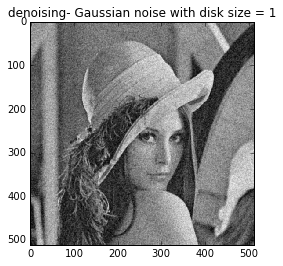

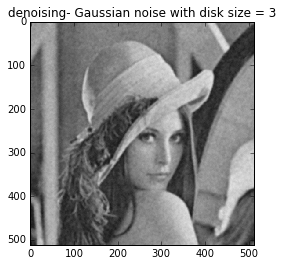

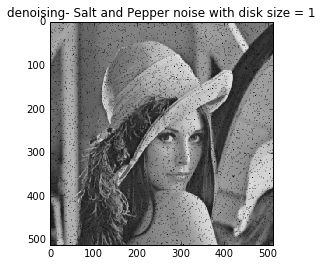

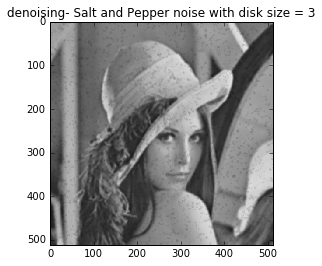

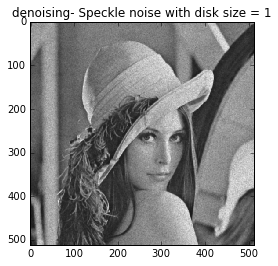

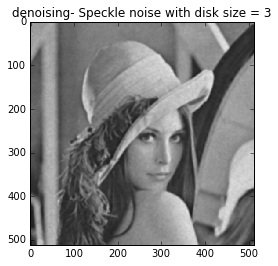

In [14]:
sz_disk = [1, 3]

for sz in sz_disk:
    lena_smooth = filters.rank.mean_percentile(lena_gaussian, disk(sz), p0=0.05, p1=0.95)
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Gaussian noise with disk size = {}'.format(sz))
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean_percentile(lena_sp, disk(sz), p0=0.05, p1=0.95)
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Salt and Pepper noise with disk size = {}'.format(sz))
    
for sz in sz_disk:
    lena_smooth = filters.rank.mean_percentile(lena_speckle, disk(sz), p0=0.05, p1=0.95)
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Speckle noise with disk size = {}'.format(sz))

** median filter: **

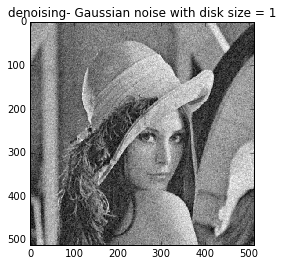

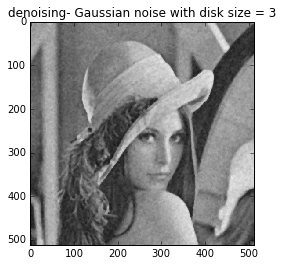

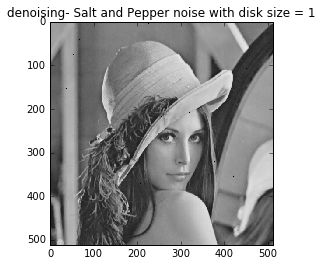

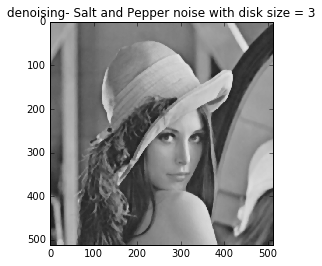

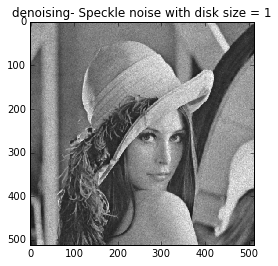

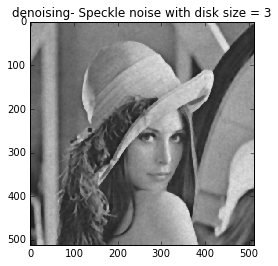

In [15]:
sz_disk = [1, 3]

for sz in sz_disk:
    lena_smooth = filters.rank.median(lena_gaussian, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Gaussian noise with disk size = {}'.format(sz))
    
for sz in sz_disk:
    lena_smooth = filters.rank.median(lena_sp, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Salt and Pepper noise with disk size = {}'.format(sz))
    
for sz in sz_disk:
    lena_smooth = filters.rank.median(lena_speckle, disk(sz))
    plt.figure()
    io.imshow(lena_smooth)
    plt.title('denoising- Speckle noise with disk size = {}'.format(sz))

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

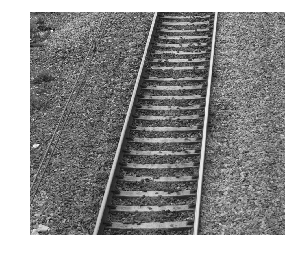

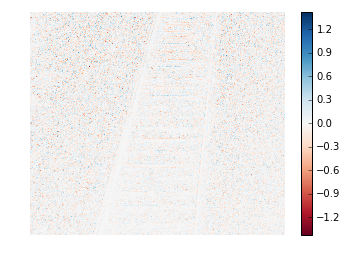

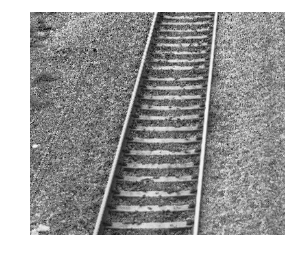

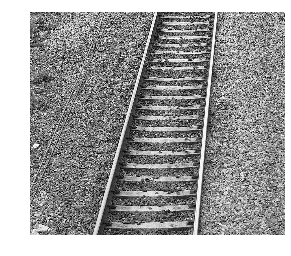

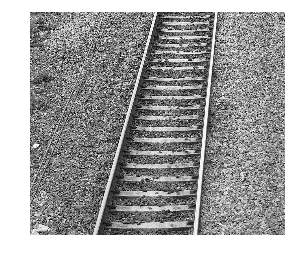

In [16]:
rail_im = io.imread(Path.__add__('railway.jpg'))
rail_im = img_as_float(color.rgb2grey(rail_im))

plt.figure
plt.axis('off')
io.imshow(rail_im)

rail_lap = laplace(rail_im)
plt.figure()
io.imshow(rail_lap)
plt.axis('off')
plt.show()
# Enhancing using the laplacian
c = 1.
rail_enh_lap = rail_im + c * rail_lap
plt.figure() 
plt.imshow(rail_enh_lap, cmap = cm.Greys_r, vmin=0,vmax=1)
plt.axis('off')
plt.show()

c = -1
rail_enh_lap = rail_im + c * rail_lap
plt.figure()
plt.imshow(rail_enh_lap, cmap = cm.Greys_r, vmin=0,vmax=1)
plt.axis('off')
plt.show()

c = -0.8
rail_enh_lap = rail_im + c * rail_lap
plt.figure()
plt.imshow(rail_enh_lap, cmap = cm.Greys_r, vmin=0,vmax=1)
plt.axis('off')
plt.show()

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

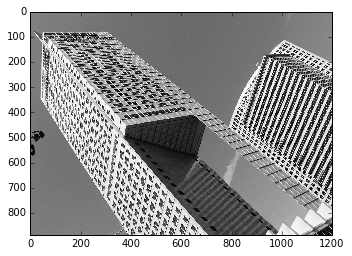

In [17]:
from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line)
from skimage.feature import canny
build_im = io.imread(Path.__add__('building.jpg'))
build_im = img_as_float(color.rgb2gray(build_im))
io.imshow(build_im)

In [180]:
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from skimage.draw import line


In [191]:

def Hough_trans(image, sigma=2, low_th= None, high_th = None, method='simp'):
    edge = canny(image,sigma, low_th, high_th)
    if method =='simp':
        hspace, angles, dist = hough_line(edge)
        hspace, angles, dist = hough_line_peaks(hspace, angles, dist)
        rows, cols = image.shape
        y0 = (dist - 0* np.cos(angles))/np.sin(angles)
        y1 = (dist - cols * np.cos(angles)) / np.sin(angles)
        plt.figure
        plt.imshow(image, cmap = plt.cm.gray)
        for i in range(0, len(y0)):
            plt.plot((0, cols),(y0[i], y1[i]), 'r-')
        
        plt.axis((0, cols, rows, 0))
        plt.axis('off')
        plt.show()
    elif method == 'prob':
        lines = probabilistic_hough_line(edge, threshold=10, line_length=5,line_gap=3)
        # threshold=10, line_length=5,line_gap=3
        
        plt.figure
        plt.imshow(image, cmap = plt.cm.gray)
        plt.axis('off')
        for line in lines:
            p0, p1 = line
            plt.plot((p0[0], p1[0]), (p0[1], p1[1]), 'r-')
        plt.show()
    else:
        print 'method is not known.'
    
    return
    



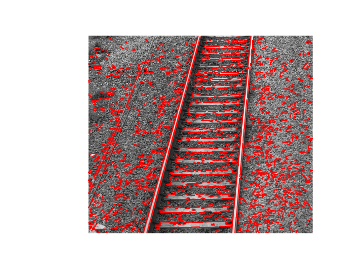

In [193]:
 Hough_trans(rail_im, 3, method='prob')


